In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

In [2]:
def relu(input):
    '''Define your relu activatino function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculate
    return output

In [3]:
def predict_with_network(input_data_point, weights):
    node_0_input = (input_data_point * weights['node_0']).sum()
    node_0_output = relu(node_0_input)
    
    node_1_input = (input_data_point * weights['node_1']).sum()
    node_1_output = relu(node_1_input)
    
    hidden_layer_values = np.array([node_0_output, node_1_output])
    input_to_final_layer = (hidden_layer_values * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    return(model_output)

In [4]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {
    'node_0': [2, 1],
    'node_1': [1, 2],
    'output': [1, 1]
}

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that caus the network to make perfect prediction (3): weights_1
weights_1 = {
    'node_0': [2, 1],
    'node_1': [1, 2],
    'output': [1, 0]
}

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


In [5]:
weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 1.5]), 'output': np.array([1, 1.5])}
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

In [6]:

from sklearn.metrics import mean_squared_error

# Create model_output_0
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))
    
# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" % mse_0)
print("Mean squared error with weights_1: %f" % mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


In [7]:
weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

In [8]:
# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


In [9]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


In [10]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse

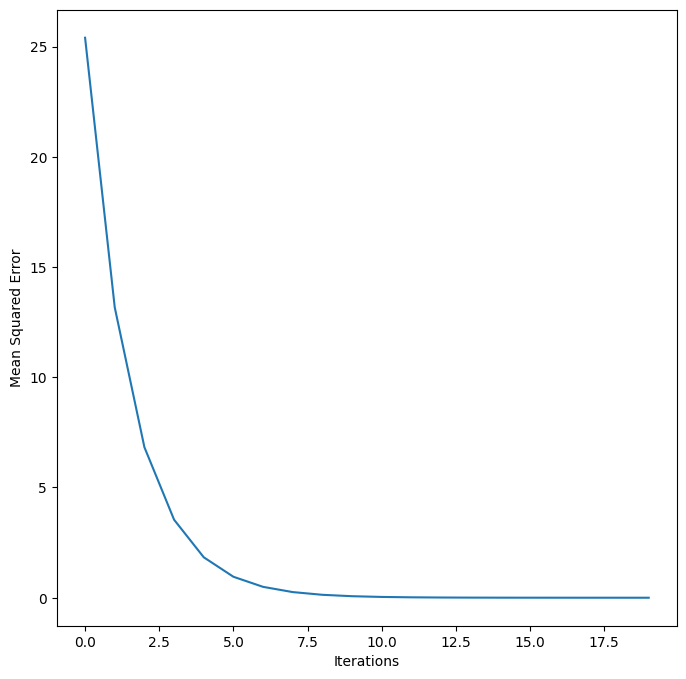

In [11]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - learning_rate * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)
    
# Plot the mse history
plt.plot(mse_hist);
plt.xlabel('Iterations');
plt.ylabel('Mean Squared Error');